## 회귀분석
- 회귀분석은 실제값과 예측값의 차이를 기반으로 한 지표들을 중심으로 성능평가가 지표가 발전

### MAE
- 실제값과 예측값의 차이를 절댓값으로 변환하여 평균한 것
- 에러의 크기가 그대로 반영
- 이상치에 영향을 받는다.

### MSE
- 실제값과 예측값의 차이를 제곱하여 평균한 것
- 실제값과 예측값 차이의 면적의 합을 의미
- 특이값이 존재하면 수치가 증가

### RMSE
- 실제값과 예측값의 차이를 제곱한 평균의 루트
- 에러를 제곱하면 에러가 클수록 그에 따른 가중치가 높이 반영
- 손실이 기하급수적으로 증가하는 상황에서 실제 오류 평균보다 값이 더 커지는 것을 상쇄하기 위해 사용

### MSLE
- 실제값과 예측값의 차이를 제곱해 평균한 것에 로그를 적용한 것
- RMSE와 같이 손실이 기하급수적으로 증가하는 상황에서 실제 오류의 평균보다 값이 커지는 것을 상쇄하기 위해 사용

### MAPE
- MAE를 퍼센트로 표시
- 오차가 예측값에서 차지하는 정도를 나타냄

### 회귀분석 순서
1. 데이터를 로드하고 확인
2. 데이터를 분할
3. 데이터를 전처리
4. 모델 학습
5. 성능 평가 및 예측값 저장

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [ ]:
# data = fetch_california_housing()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/datasets/_base.py:1472: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)>

In [ ]:
# data.keys()

In [ ]:
# df = pd.DataFrame(data['data'], columns=data['feature_names'])
# df.head()

In [ ]:
# data.target

In [ ]:
# df는 독립변수
# target 종속변수

In [ ]:
# df['Value'] = df['target']

In [ ]:
# 데이터로드 안되서 불러옴
df = pd.read_csv("califonia.csv")

In [ ]:
# 데이터프레임을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Value       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# 결측치 확인
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Value         0
dtype: int64

In [10]:
# 산점도와 선형회귀 직선 시각화
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

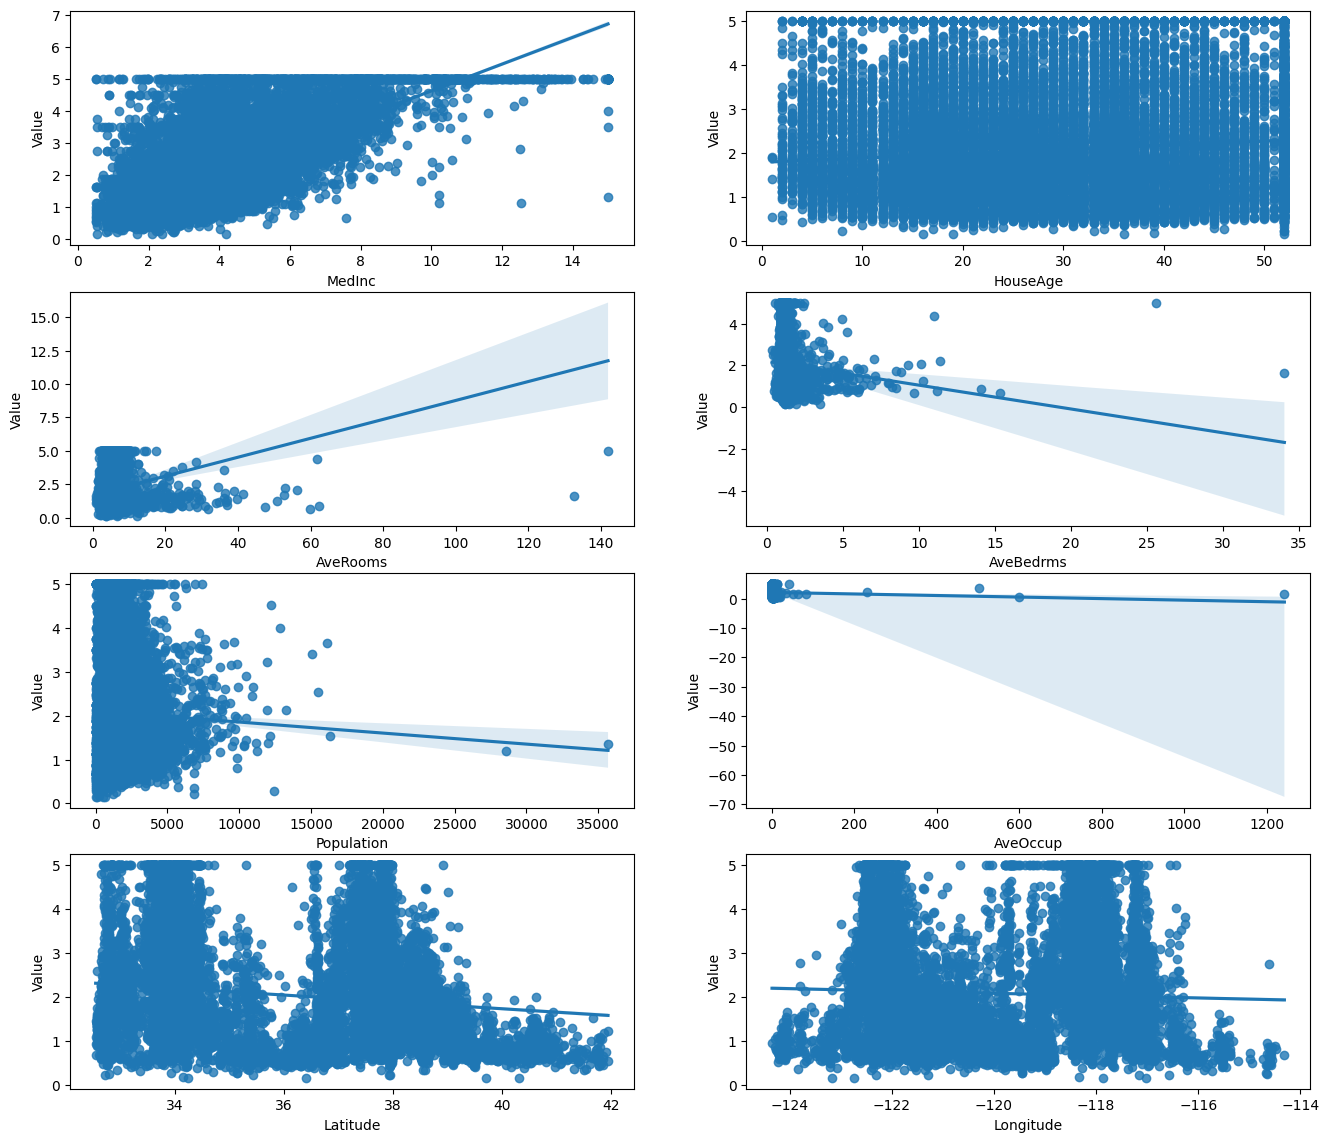

In [18]:
fig, axes = plt.subplots(figsize = (16, 14), nrows = 4, ncols = 2)

for i in range(8):
    row = int(i/2)
    col = i%2
    sns.regplot(x = df.iloc[:, i], y = df['Value'], data=df, ax = axes[row][col])

plt.show